In [1]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocesado y modelado
# ==============================================================================
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm
from scipy import stats

# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


## Leemos el dataset y valores perdidos "?"
### Elimino columnas Unnamed y numeros de serie

In [2]:
na_values = ["Nan"]
#datos = pd.read_csv("X:/Documentos/Formacion/MBIG/ProjectoJamones/cerditos.csv", encoding = "utf-8", na_values= na_values)
datos = pd.read_csv("X:/Documentos/Formacion/MBIG/ProjectoJamones/Datos_NO_oleicos_P_indiv_01.csv", delimiter=',', encoding = "utf-8", na_values= na_values)
pd.options.display.max_columns = None
datos.head(10)

datos

,TipoArticulo,Anhada,Partida,Raza,Alimentacion,NumeroSerieLc,AcidoOleico,AcidoPalmitico,AcidoEstearico,AcidoLinoleico,PesoVarios,Pesovientres,PesoCerdos,PesoNetoCanal,Nacimiento,CodigoMatadero,NroAnimales,PesoEntrada,TipoPesada,PesoSalida,DescripcionArticulo,FechaEntrada,FechaSalida
0,Jamón,2021,40521,50% IBERICO,CEBO DE CAMPO,147071472876,0,0,0,0,0.0,0.0,0.0,0.0,NaN,1,153,17.50,Individual,7.42,JAMON CEBO CAMPO 50% 7-8 KGS DON IBERICOO 50% ...,2021-10-05 00:00:00.000,2021-11-10 00:00:00.000
1,Jamón,2021,40521,50% IBERICO,CEBO DE CAMPO,147071546522,0,0,0,0,0.0,0.0,0.0,0.0,NaN,1,153,17.74,Individual,7.66,JAMON CEBO CAMPO 50% 7-8 KGS DON IBERICOO 50% ...,2021-10-05 00:00:00.000,2021-11-10 00:00:00.000
2,Jamón,2021,40521,50% IBERICO,CEBO DE CAMPO,147071473682,0,0,0,0,0.0,0.0,0.0,0.0,NaN,1,153,17.60,Individual,7.54,JAMON CEBO CAMPO 50% 7-8 KGS DON IBERICOO 50% ...,2021-10-05 00:00:00.000,2021-11-04 00:00:00.000
3,Jamón,2021,40521,50% IBERICO,CEBO DE CAMPO,147071547321,0,0,0,0,0.0,0.0,0.0,0.0,NaN,1,153,17.58,Individual,7.50,JAMON CEBO CAMPO 50% 7-8 KGS DON IBERICOO 50% ...,2021-10-05 00:00:00.000,2021-11-10 00:00:00.000
4,Jamón,2021,40521,50% IBERICO,CEBO DE CAMPO,147069450763,0,0,0,0,0.0,0.0,0.0,0.0,NaN,1,153,17.38,Individual,7.32,JAMON CEBO CAMPO 50% 7-8 KGS DON IBERICOO 50% ...,2021-10-05 00:00:00.000,2021-11-10 00:00:00.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,Jamón,2021,40521,50% IBERICO,CEBO DE CAMPO,147071544399,0,0,0,0,0.0,0.0,0.0,0.0,NaN,1,153,17.12,Individual,7.04,JAMON CEBO CAMPO 50% 7-8 KGS DON IBERICOO 50% ...,2021-10-05 00:00:00.000,2021-11-04 00:00:00.000
300,Jamón,2021,40521,50% IBERICO,CEBO DE CAMPO,147071544832,0,0,0,0,0.0,0.0,0.0,0.0,NaN,1,153,17.76,Individual,7.68,JAMON CEBO CAMPO 50% 7-8 KGS DON IBERICOO 50% ...,2021-10-05 00:00:00.000,2021-11-04 00:00:00.000
301,Jamón,2021,40521,50% IBERICO,CEBO DE CAMPO,147071546867,0,0,0,0,0.0,0.0,0.0,0.0,NaN,1,153,18.04,Individual,7.98,JAMON CEBO CAMPO 50% 7-8 KGS DON IBERICOO 50% ...,2021-10-05 00:00:00.000,2021-11-04 00:00:00.000
302,Jamón,2021,40521,50% IBERICO,CEBO DE CAMPO,147071544931,0,0,0,0,0.0,0.0,0.0,0.0,NaN,1,153,17.30,Individual,7.22,JAMON CEBO CAMPO 50% 7-8 KGS DON IBERICOO 50% ...,2021-10-05 00:00:00.000,2021-11-10 00:00:00.000


In [3]:
datos.drop(columns=['NumeroSerieLc','AcidoOleico','AcidoPalmitico','AcidoEstearico','AcidoLinoleico',
                    'PesoVarios','Pesovientres','PesoCerdos','PesoNetoCanal','Nacimiento','CodigoMatadero',
                    'NroAnimales','TipoArticulo','Anhada','Partida','TipoPesada'], axis=1, inplace=True)
datos

,Raza,Alimentacion,PesoEntrada,PesoSalida,DescripcionArticulo,FechaEntrada,FechaSalida
0,50% IBERICO,CEBO DE CAMPO,17.50,7.42,JAMON CEBO CAMPO 50% 7-8 KGS DON IBERICOO 50% ...,2021-10-05 00:00:00.000,2021-11-10 00:00:00.000
1,50% IBERICO,CEBO DE CAMPO,17.74,7.66,JAMON CEBO CAMPO 50% 7-8 KGS DON IBERICOO 50% ...,2021-10-05 00:00:00.000,2021-11-10 00:00:00.000
2,50% IBERICO,CEBO DE CAMPO,17.60,7.54,JAMON CEBO CAMPO 50% 7-8 KGS DON IBERICOO 50% ...,2021-10-05 00:00:00.000,2021-11-04 00:00:00.000
3,50% IBERICO,CEBO DE CAMPO,17.58,7.50,JAMON CEBO CAMPO 50% 7-8 KGS DON IBERICOO 50% ...,2021-10-05 00:00:00.000,2021-11-10 00:00:00.000
4,50% IBERICO,CEBO DE CAMPO,17.38,7.32,JAMON CEBO CAMPO 50% 7-8 KGS DON IBERICOO 50% ...,2021-10-05 00:00:00.000,2021-11-10 00:00:00.000
...,...,...,...,...,...,...,...
299,50% IBERICO,CEBO DE CAMPO,17.12,7.04,JAMON CEBO CAMPO 50% 7-8 KGS DON IBERICOO 50% ...,2021-10-05 00:00:00.000,2021-11-04 00:00:00.000
300,50% IBERICO,CEBO DE CAMPO,17.76,7.68,JAMON CEBO CAMPO 50% 7-8 KGS DON IBERICOO 50% ...,2021-10-05 00:00:00.000,2021-11-04 00:00:00.000
301,50% IBERICO,CEBO DE CAMPO,18.04,7.98,JAMON CEBO CAMPO 50% 7-8 KGS DON IBERICOO 50% ...,2021-10-05 00:00:00.000,2021-11-04 00:00:00.000
302,50% IBERICO,CEBO DE CAMPO,17.30,7.22,JAMON CEBO CAMPO 50% 7-8 KGS DON IBERICOO 50% ...,2021-10-05 00:00:00.000,2021-11-10 00:00:00.000


### Dimensiones de conjunto de Datos

In [4]:
print("Dimension dataset:", (datos.shape))
print()
datos.info()

Dimension dataset: (304, 7)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304 entries, 0 to 303
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Raza                 304 non-null    object 
 1   Alimentacion         304 non-null    object 
 2   PesoEntrada          304 non-null    float64
 3   PesoSalida           304 non-null    float64
 4   DescripcionArticulo  304 non-null    object 
 5   FechaEntrada         304 non-null    object 
 6   FechaSalida          304 non-null    object 
dtypes: float64(2), object(5)
memory usage: 16.8+ KB


### Reviso valores null


In [5]:
sns.set(rc ={"figure.figsize":(15,8)})

print(datos.isna().sum().sum())
print(datos.isnull().sum().sum())
print(datos.isna().sum())

0
0
Raza                   0
Alimentacion           0
PesoEntrada            0
PesoSalida             0
DescripcionArticulo    0
FechaEntrada           0
FechaSalida            0
dtype: int64


<AxesSubplot:>

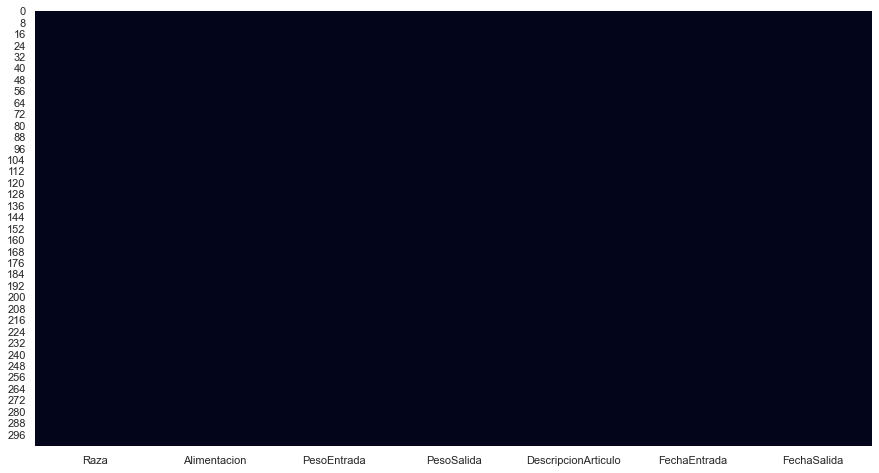

In [6]:
sns.heatmap(datos.isnull(),cbar=False)

# Elimino Fechas dobles y datos faltantes 


In [7]:
#datos = datos.drop(datos[datos['Nacimiento'].str.len()>10].index)
#datos = datos.drop(datos[datos['Nacimiento'].isna()].index)
datos = datos.drop(datos[datos['PesoSalida'].isna()].index)

In [8]:
datos

,Raza,Alimentacion,PesoEntrada,PesoSalida,DescripcionArticulo,FechaEntrada,FechaSalida
0,50% IBERICO,CEBO DE CAMPO,17.50,7.42,JAMON CEBO CAMPO 50% 7-8 KGS DON IBERICOO 50% ...,2021-10-05 00:00:00.000,2021-11-10 00:00:00.000
1,50% IBERICO,CEBO DE CAMPO,17.74,7.66,JAMON CEBO CAMPO 50% 7-8 KGS DON IBERICOO 50% ...,2021-10-05 00:00:00.000,2021-11-10 00:00:00.000
2,50% IBERICO,CEBO DE CAMPO,17.60,7.54,JAMON CEBO CAMPO 50% 7-8 KGS DON IBERICOO 50% ...,2021-10-05 00:00:00.000,2021-11-04 00:00:00.000
3,50% IBERICO,CEBO DE CAMPO,17.58,7.50,JAMON CEBO CAMPO 50% 7-8 KGS DON IBERICOO 50% ...,2021-10-05 00:00:00.000,2021-11-10 00:00:00.000
4,50% IBERICO,CEBO DE CAMPO,17.38,7.32,JAMON CEBO CAMPO 50% 7-8 KGS DON IBERICOO 50% ...,2021-10-05 00:00:00.000,2021-11-10 00:00:00.000
...,...,...,...,...,...,...,...
299,50% IBERICO,CEBO DE CAMPO,17.12,7.04,JAMON CEBO CAMPO 50% 7-8 KGS DON IBERICOO 50% ...,2021-10-05 00:00:00.000,2021-11-04 00:00:00.000
300,50% IBERICO,CEBO DE CAMPO,17.76,7.68,JAMON CEBO CAMPO 50% 7-8 KGS DON IBERICOO 50% ...,2021-10-05 00:00:00.000,2021-11-04 00:00:00.000
301,50% IBERICO,CEBO DE CAMPO,18.04,7.98,JAMON CEBO CAMPO 50% 7-8 KGS DON IBERICOO 50% ...,2021-10-05 00:00:00.000,2021-11-04 00:00:00.000
302,50% IBERICO,CEBO DE CAMPO,17.30,7.22,JAMON CEBO CAMPO 50% 7-8 KGS DON IBERICOO 50% ...,2021-10-05 00:00:00.000,2021-11-10 00:00:00.000


In [9]:
datos.shape

(304, 7)

### Reviso Duplicados

In [10]:
print(datos.duplicated().sum().sum())
dups = datos.duplicated()
# Miramos si hay duplicados
print('Algun duplicado? {}'.format(dups.any()))
print()
print('Registros duplicados: \n{}'.format(datos[dups]))
print()


113
Algun duplicado? True

Registros duplicados: 
            Raza   Alimentacion  PesoEntrada  PesoSalida  \
8    50% IBERICO  CEBO DE CAMPO        17.92        7.86   
15   50% IBERICO  CEBO DE CAMPO        17.70        7.62   
25   50% IBERICO  CEBO DE CAMPO        17.62        7.56   
26   50% IBERICO  CEBO DE CAMPO        17.92        7.86   
29   50% IBERICO  CEBO DE CAMPO        17.56        7.50   
..           ...            ...          ...         ...   
298  50% IBERICO  CEBO DE CAMPO        17.66        7.60   
300  50% IBERICO  CEBO DE CAMPO        17.76        7.68   
301  50% IBERICO  CEBO DE CAMPO        18.04        7.98   
302  50% IBERICO  CEBO DE CAMPO        17.30        7.22   
303  50% IBERICO  CEBO DE CAMPO        17.98        7.92   

                                   DescripcionArticulo  \
8    JAMON CEBO CAMPO 50% 7-8 KGS DON IBERICOO 50% ...   
15   JAMON CEBO CAMPO 50% 7-8 KGS DON IBERICOO 50% ...   
25   JAMON CEBO CAMPO 50% 7-8 KGS DON IBERICOO 50% ... 

### Datos unicos por columna

In [11]:
counts = datos.nunique()
counts

Raza                    2
Alimentacion            2
PesoEntrada            72
PesoSalida             63
DescripcionArticulo     4
FechaEntrada            4
FechaSalida             4
dtype: int64

### Corregimos Valores duplicados o iguales con distinto nombre

In [12]:
datos['Raza'] = datos['Raza'].replace(datos[datos['Raza'].str.len()>10].index)

datos['Raza'].replace(to_replace={'IBERICO': '50% IBERICO', 'IBERICO PURO': '100% IBERICO'}, inplace=True)
datos['Raza'].unique()

array(['50% IBERICO', '100% IBERICO'], dtype=object)

# Formatos de fechas y creamos el target1: tiempo de maduración

In [13]:
datos['FechaEntrada'] =  pd.to_datetime(datos['FechaEntrada'])
datos['FechaSalida'] =  pd.to_datetime(datos['FechaSalida'])
#datos['Nacimiento'] =  pd.to_datetime(datos['Nacimiento'])

### No enemos edad de nacimiento - Añadimos variable Edad de sacrificio - 

In [14]:
# PASO 5 CREAMOS COLUMNA EdadSacrificio CON FECHAS DE NACIMIENTO Y ENTRADA DE LA PIEZA

# EdadSacrificio EN DÍAS
#datos['EdadSacrificio']= datos['FechaEntrada'] - datos['Nacimiento']
#datos['EdadSacrificio']=datos['EdadSacrificio'].dt.days.astype(int)
#datos['EdadSacrificio']



In [15]:
# EdadSacrificioMESES EN MESES
#datos["EdadSacrificio_MESES"]=round(((datos['FechaEntrada'] - datos['Nacimiento']).dt.days)/30.41).astype(int)
#datos["EdadSacrificio_MESES"]

## Target1: T_Maduracion

In [16]:
from datetime import datetime as dt

datos["T_Maduracion"]= (datos['FechaSalida']-datos['FechaEntrada'])
datos["T_Maduracion"]= datos['T_Maduracion'].dt.days.astype(int)
datos["T_Maduracion"]



0      36
1      36
2      30
3      36
4      36
       ..
299    30
300    30
301    30
302    36
303    36
Name: T_Maduracion, Length: 304, dtype: int32

In [17]:
# TiempoMaduracionMESES EN MESES
datos["T_Maduracion_MESES"]=round(((datos['FechaSalida']-datos['FechaEntrada']).dt.days)/30.41).astype(int)
datos["T_Maduracion_MESES"]

0      1
1      1
2      1
3      1
4      1
      ..
299    1
300    1
301    1
302    1
303    1
Name: T_Maduracion_MESES, Length: 304, dtype: int32

In [18]:
datos.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304 entries, 0 to 303
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Raza                 304 non-null    object        
 1   Alimentacion         304 non-null    object        
 2   PesoEntrada          304 non-null    float64       
 3   PesoSalida           304 non-null    float64       
 4   DescripcionArticulo  304 non-null    object        
 5   FechaEntrada         304 non-null    datetime64[ns]
 6   FechaSalida          304 non-null    datetime64[ns]
 7   T_Maduracion         304 non-null    int32         
 8   T_Maduracion_MESES   304 non-null    int32         
dtypes: datetime64[ns](2), float64(2), int32(2), object(3)
memory usage: 19.1+ KB


In [19]:
datos.describe()

,PesoEntrada,PesoSalida,T_Maduracion,T_Maduracion_MESES
count,304.000000,304.000000,304.000000,304.000000
mean,17.334967,7.660230,43.990132,1.375000
std,1.966215,0.347223,38.814315,1.236478
min,7.260000,6.520000,30.000000,1.000000
25%,17.500000,7.440000,30.000000,1.000000
50%,17.760000,7.700000,30.000000,1.000000
75%,17.940000,7.880000,36.000000,1.000000
max,18.910000,10.620000,332.000000,11.000000


### Primera tabla de correlaciones - para variables númericas

<AxesSubplot:>

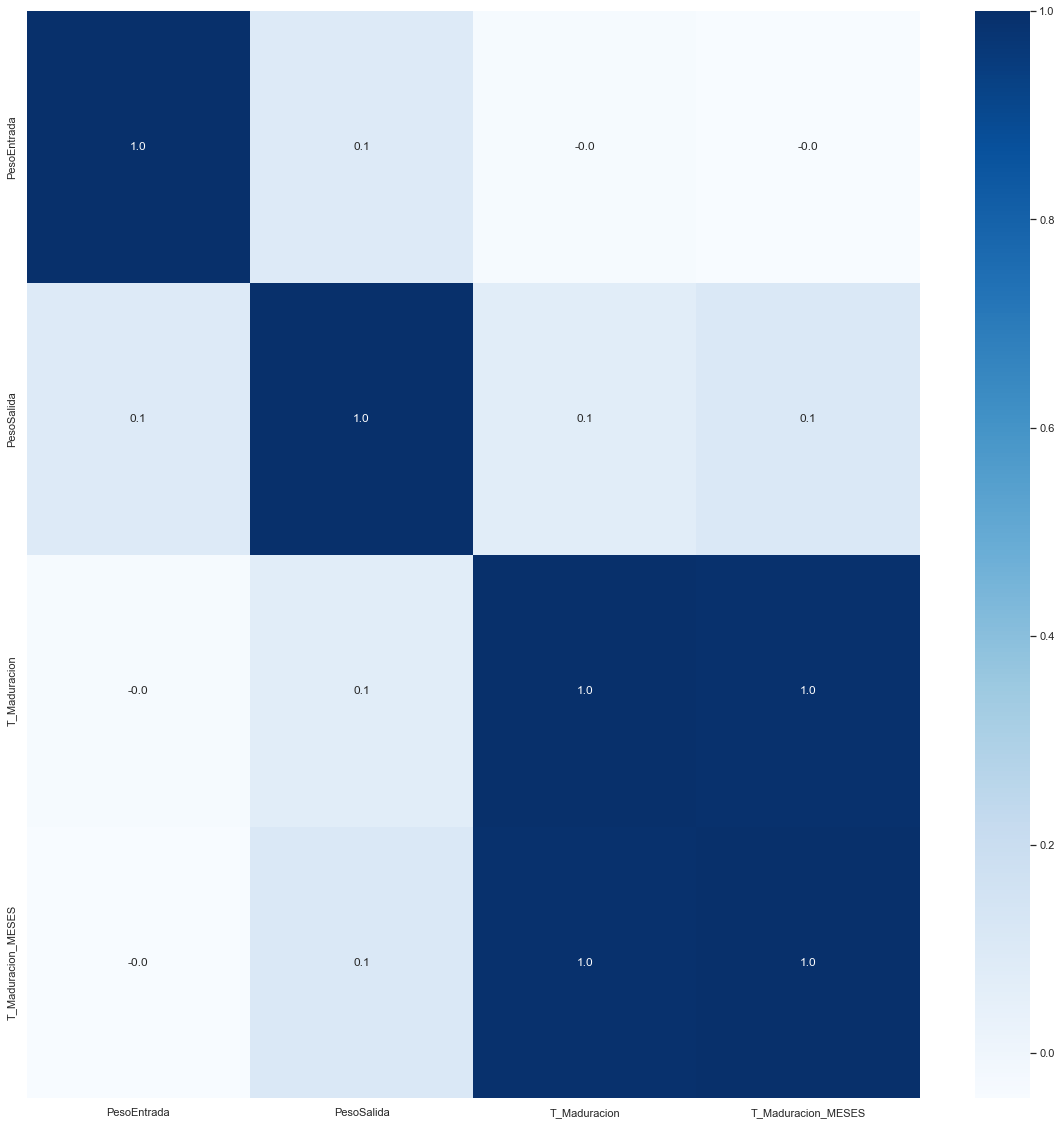

In [20]:
correlation_matrix = (datos).corr()
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, cbar=True, fmt='.1f', annot=True, cmap='Blues')

### La correlación con el peso de Salida es 0,1 muy baja....

### Eliminamos variables que su correlacion es 0 con el tiempo de maduración 


### Detección de Outliers - por el momento lo dejamos aparcado

In [21]:
datos.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304 entries, 0 to 303
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Raza                 304 non-null    object        
 1   Alimentacion         304 non-null    object        
 2   PesoEntrada          304 non-null    float64       
 3   PesoSalida           304 non-null    float64       
 4   DescripcionArticulo  304 non-null    object        
 5   FechaEntrada         304 non-null    datetime64[ns]
 6   FechaSalida          304 non-null    datetime64[ns]
 7   T_Maduracion         304 non-null    int32         
 8   T_Maduracion_MESES   304 non-null    int32         
dtypes: datetime64[ns](2), float64(2), int32(2), object(3)
memory usage: 19.1+ KB


In [22]:
counts = datos.nunique()
counts

Raza                    2
Alimentacion            2
PesoEntrada            72
PesoSalida             63
DescripcionArticulo     4
FechaEntrada            4
FechaSalida             4
T_Maduracion            6
T_Maduracion_MESES      5
dtype: int64

### ONE HOT ENCODER- codificación variables categóricas

In [23]:
# PASO 7 ONE_HOT_ENCODER A VARIABLES CON MENOS DE 10 CLASES

#VAMOS A HACER CREAR UN DATASET ONE_HOT_ENCODER APLICANDO EL ONE_HOT A TODAS LAS CATEGORÍAS QUE 
#TENGAN MENOS DE 11 CATEGORÍAS
'''datos_cod = datos.copy()


#Lista de número de categorías distintas del dataSet original
uvs = datos.nunique().tolist()

#Apuntaré en las siguientes dos listas los índices de las columnas de tengan menos y mas/igual de 11 categorías
ncol = []
ncolinv = []
#Con el bucle relleno ambas listas
c = 0
for i in uvs:
    if i<=10:
        ncol.append(c)
    else:
        ncolinv.append(c)
    c+=1
'''
#DataSet con variables de menos de 11 categorías
datos_codA=datos[["Raza","Alimentacion"]]

#DataSet con variables de mas de 10 categorías
datos_codB=datos[["DescripcionArticulo","PesoEntrada","PesoSalida","FechaEntrada","FechaSalida","T_Maduracion","T_Maduracion_MESES"]]

    
#Defino el ONE_HOT_ENCODER casero que hemos fabricado para no cargarnos el dataframe
def createDummies(df, var_name):
    dummy =pd.get_dummies(df[var_name])
    df=df.drop(var_name,axis=1)
    df=pd.concat([df,dummy],axis=1)
    return(df)
    
#Debido a que esta pensado para usarse con objects o strings hago la transformación pertinente
listcol = datos_codA.columns.tolist()
datos_codA = datos_codA.astype(str)

#Aplico el ONE_HOT_ENCODER casero al dataSet de menos de 11 categorías
datos_codA = createDummies(datos_codA, listcol)

#Concateno el dataSet que tiene variables con mas de 11 categorías
datos_OneH = pd.concat([datos_codA,datos_codB], axis = 1)


datos_OneH

,Raza_100% IBERICO,Raza_50% IBERICO,Alimentacion_BELLOTA,Alimentacion_CEBO DE CAMPO,DescripcionArticulo,PesoEntrada,PesoSalida,FechaEntrada,FechaSalida,T_Maduracion,T_Maduracion_MESES
0,0,1,0,1,JAMON CEBO CAMPO 50% 7-8 KGS DON IBERICOO 50% ...,17.50,7.42,2021-10-05,2021-11-10,36,1
1,0,1,0,1,JAMON CEBO CAMPO 50% 7-8 KGS DON IBERICOO 50% ...,17.74,7.66,2021-10-05,2021-11-10,36,1
2,0,1,0,1,JAMON CEBO CAMPO 50% 7-8 KGS DON IBERICOO 50% ...,17.60,7.54,2021-10-05,2021-11-04,30,1
3,0,1,0,1,JAMON CEBO CAMPO 50% 7-8 KGS DON IBERICOO 50% ...,17.58,7.50,2021-10-05,2021-11-10,36,1
4,0,1,0,1,JAMON CEBO CAMPO 50% 7-8 KGS DON IBERICOO 50% ...,17.38,7.32,2021-10-05,2021-11-10,36,1
...,...,...,...,...,...,...,...,...,...,...,...
299,0,1,0,1,JAMON CEBO CAMPO 50% 7-8 KGS DON IBERICOO 50% ...,17.12,7.04,2021-10-05,2021-11-04,30,1
300,0,1,0,1,JAMON CEBO CAMPO 50% 7-8 KGS DON IBERICOO 50% ...,17.76,7.68,2021-10-05,2021-11-04,30,1
301,0,1,0,1,JAMON CEBO CAMPO 50% 7-8 KGS DON IBERICOO 50% ...,18.04,7.98,2021-10-05,2021-11-04,30,1
302,0,1,0,1,JAMON CEBO CAMPO 50% 7-8 KGS DON IBERICOO 50% ...,17.30,7.22,2021-10-05,2021-11-10,36,1


In [24]:
datos

,Raza,Alimentacion,PesoEntrada,PesoSalida,DescripcionArticulo,FechaEntrada,FechaSalida,T_Maduracion,T_Maduracion_MESES
0,50% IBERICO,CEBO DE CAMPO,17.50,7.42,JAMON CEBO CAMPO 50% 7-8 KGS DON IBERICOO 50% ...,2021-10-05,2021-11-10,36,1
1,50% IBERICO,CEBO DE CAMPO,17.74,7.66,JAMON CEBO CAMPO 50% 7-8 KGS DON IBERICOO 50% ...,2021-10-05,2021-11-10,36,1
2,50% IBERICO,CEBO DE CAMPO,17.60,7.54,JAMON CEBO CAMPO 50% 7-8 KGS DON IBERICOO 50% ...,2021-10-05,2021-11-04,30,1
3,50% IBERICO,CEBO DE CAMPO,17.58,7.50,JAMON CEBO CAMPO 50% 7-8 KGS DON IBERICOO 50% ...,2021-10-05,2021-11-10,36,1
4,50% IBERICO,CEBO DE CAMPO,17.38,7.32,JAMON CEBO CAMPO 50% 7-8 KGS DON IBERICOO 50% ...,2021-10-05,2021-11-10,36,1
...,...,...,...,...,...,...,...,...,...
299,50% IBERICO,CEBO DE CAMPO,17.12,7.04,JAMON CEBO CAMPO 50% 7-8 KGS DON IBERICOO 50% ...,2021-10-05,2021-11-04,30,1
300,50% IBERICO,CEBO DE CAMPO,17.76,7.68,JAMON CEBO CAMPO 50% 7-8 KGS DON IBERICOO 50% ...,2021-10-05,2021-11-04,30,1
301,50% IBERICO,CEBO DE CAMPO,18.04,7.98,JAMON CEBO CAMPO 50% 7-8 KGS DON IBERICOO 50% ...,2021-10-05,2021-11-04,30,1
302,50% IBERICO,CEBO DE CAMPO,17.30,7.22,JAMON CEBO CAMPO 50% 7-8 KGS DON IBERICOO 50% ...,2021-10-05,2021-11-10,36,1


In [25]:
from sklearn.preprocessing import OrdinalEncoder

# PASO 9 CODIFICAMOS CON ORDINAL ENCODER
codificar = ["DescripcionArticulo"]
for columnas in codificar:
    oe = OrdinalEncoder()
    datos_OneH[columnas] = oe.fit_transform(datos_OneH[[columnas]])

In [26]:
datos_OneH

,Raza_100% IBERICO,Raza_50% IBERICO,Alimentacion_BELLOTA,Alimentacion_CEBO DE CAMPO,DescripcionArticulo,PesoEntrada,PesoSalida,FechaEntrada,FechaSalida,T_Maduracion,T_Maduracion_MESES
0,0,1,0,1,0.0,17.50,7.42,2021-10-05,2021-11-10,36,1
1,0,1,0,1,0.0,17.74,7.66,2021-10-05,2021-11-10,36,1
2,0,1,0,1,0.0,17.60,7.54,2021-10-05,2021-11-04,30,1
3,0,1,0,1,0.0,17.58,7.50,2021-10-05,2021-11-10,36,1
4,0,1,0,1,0.0,17.38,7.32,2021-10-05,2021-11-10,36,1
...,...,...,...,...,...,...,...,...,...,...,...
299,0,1,0,1,0.0,17.12,7.04,2021-10-05,2021-11-04,30,1
300,0,1,0,1,0.0,17.76,7.68,2021-10-05,2021-11-04,30,1
301,0,1,0,1,0.0,18.04,7.98,2021-10-05,2021-11-04,30,1
302,0,1,0,1,0.0,17.30,7.22,2021-10-05,2021-11-10,36,1


#### Estudio de Correlaciones

In [27]:
def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matriz de correlación de pandas en formato tidy
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)



corr_matrix = datos_OneH.select_dtypes(include=['float64', 'int']).corr(method='pearson')
tidy_corr_matrix(corr_matrix).head(20)

,variable_1,variable_2,r,abs_r
23,T_Maduracion_MESES,T_Maduracion,0.995133,0.995133
19,T_Maduracion,T_Maduracion_MESES,0.995133,0.995133
3,DescripcionArticulo,T_Maduracion,0.993921,0.993921
15,T_Maduracion,DescripcionArticulo,0.993921,0.993921
4,DescripcionArticulo,T_Maduracion_MESES,0.988861,0.988861
20,T_Maduracion_MESES,DescripcionArticulo,0.988861,0.988861
14,PesoSalida,T_Maduracion_MESES,0.111107,0.111107
22,T_Maduracion_MESES,PesoSalida,0.111107,0.111107
7,PesoEntrada,PesoSalida,0.091584,0.091584
11,PesoSalida,PesoEntrada,0.091584,0.091584


<AxesSubplot:>

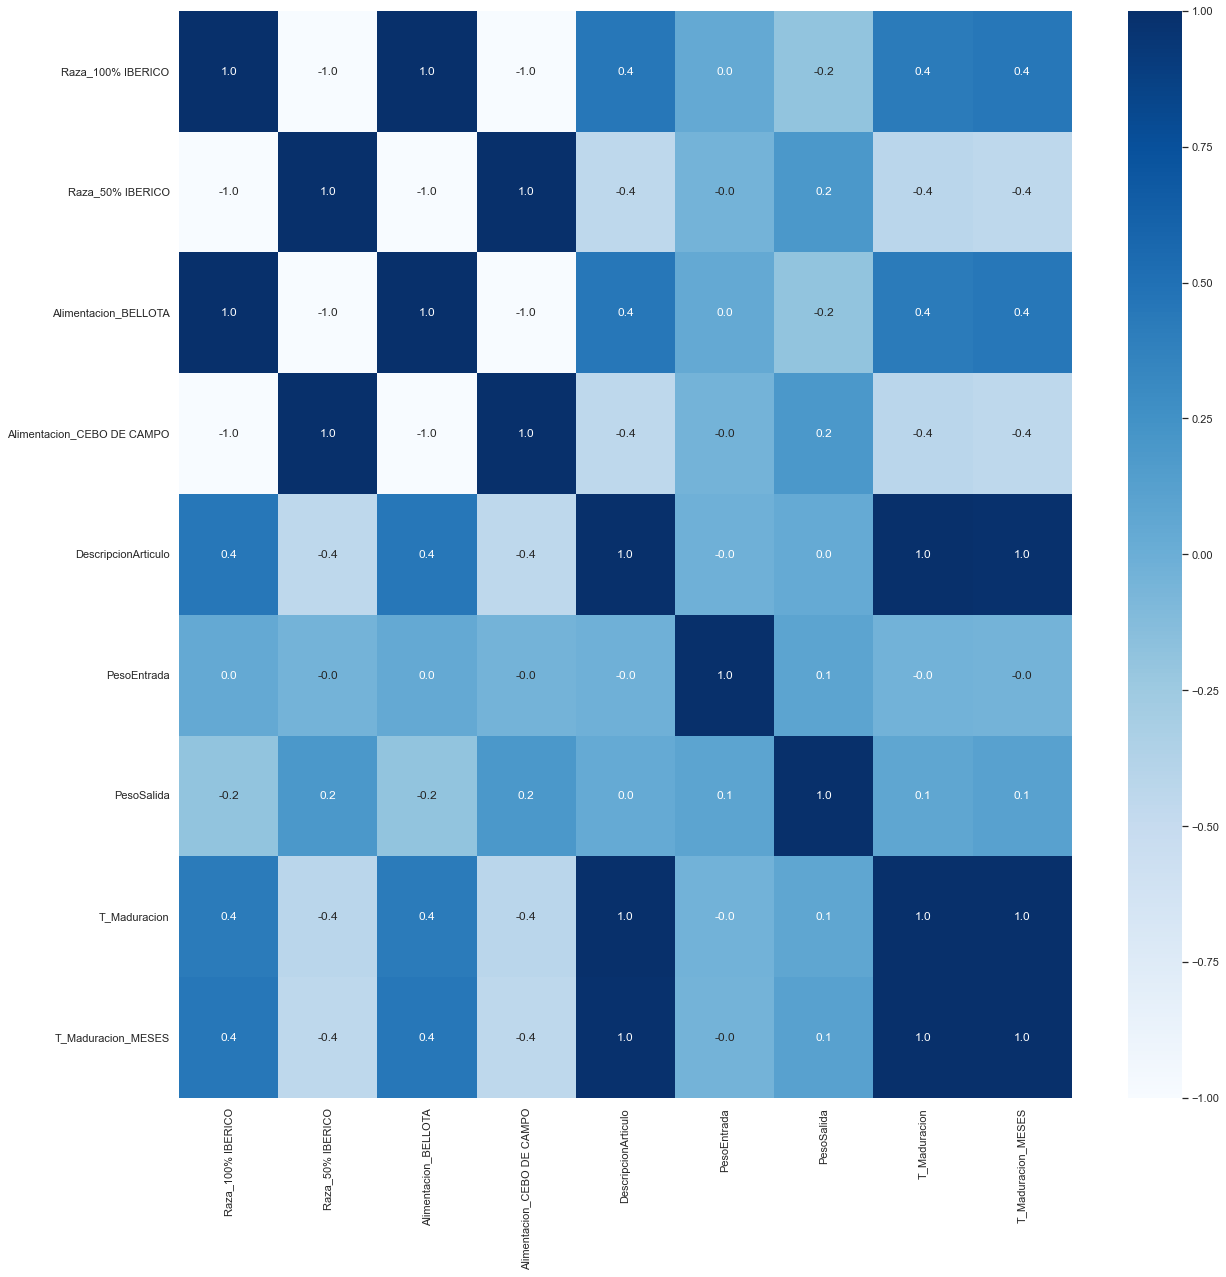

In [28]:
correlation_matrix = (datos_OneH).corr()
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, cbar=True, fmt='.1f', annot=True, cmap='Blues')

In [29]:
datos_OneH.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304 entries, 0 to 303
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Raza_100% IBERICO           304 non-null    uint8         
 1   Raza_50% IBERICO            304 non-null    uint8         
 2   Alimentacion_BELLOTA        304 non-null    uint8         
 3   Alimentacion_CEBO DE CAMPO  304 non-null    uint8         
 4   DescripcionArticulo         304 non-null    float64       
 5   PesoEntrada                 304 non-null    float64       
 6   PesoSalida                  304 non-null    float64       
 7   FechaEntrada                304 non-null    datetime64[ns]
 8   FechaSalida                 304 non-null    datetime64[ns]
 9   T_Maduracion                304 non-null    int32         
 10  T_Maduracion_MESES          304 non-null    int32         
dtypes: datetime64[ns](2), float64(3), int32(2), uint8(4)
memor

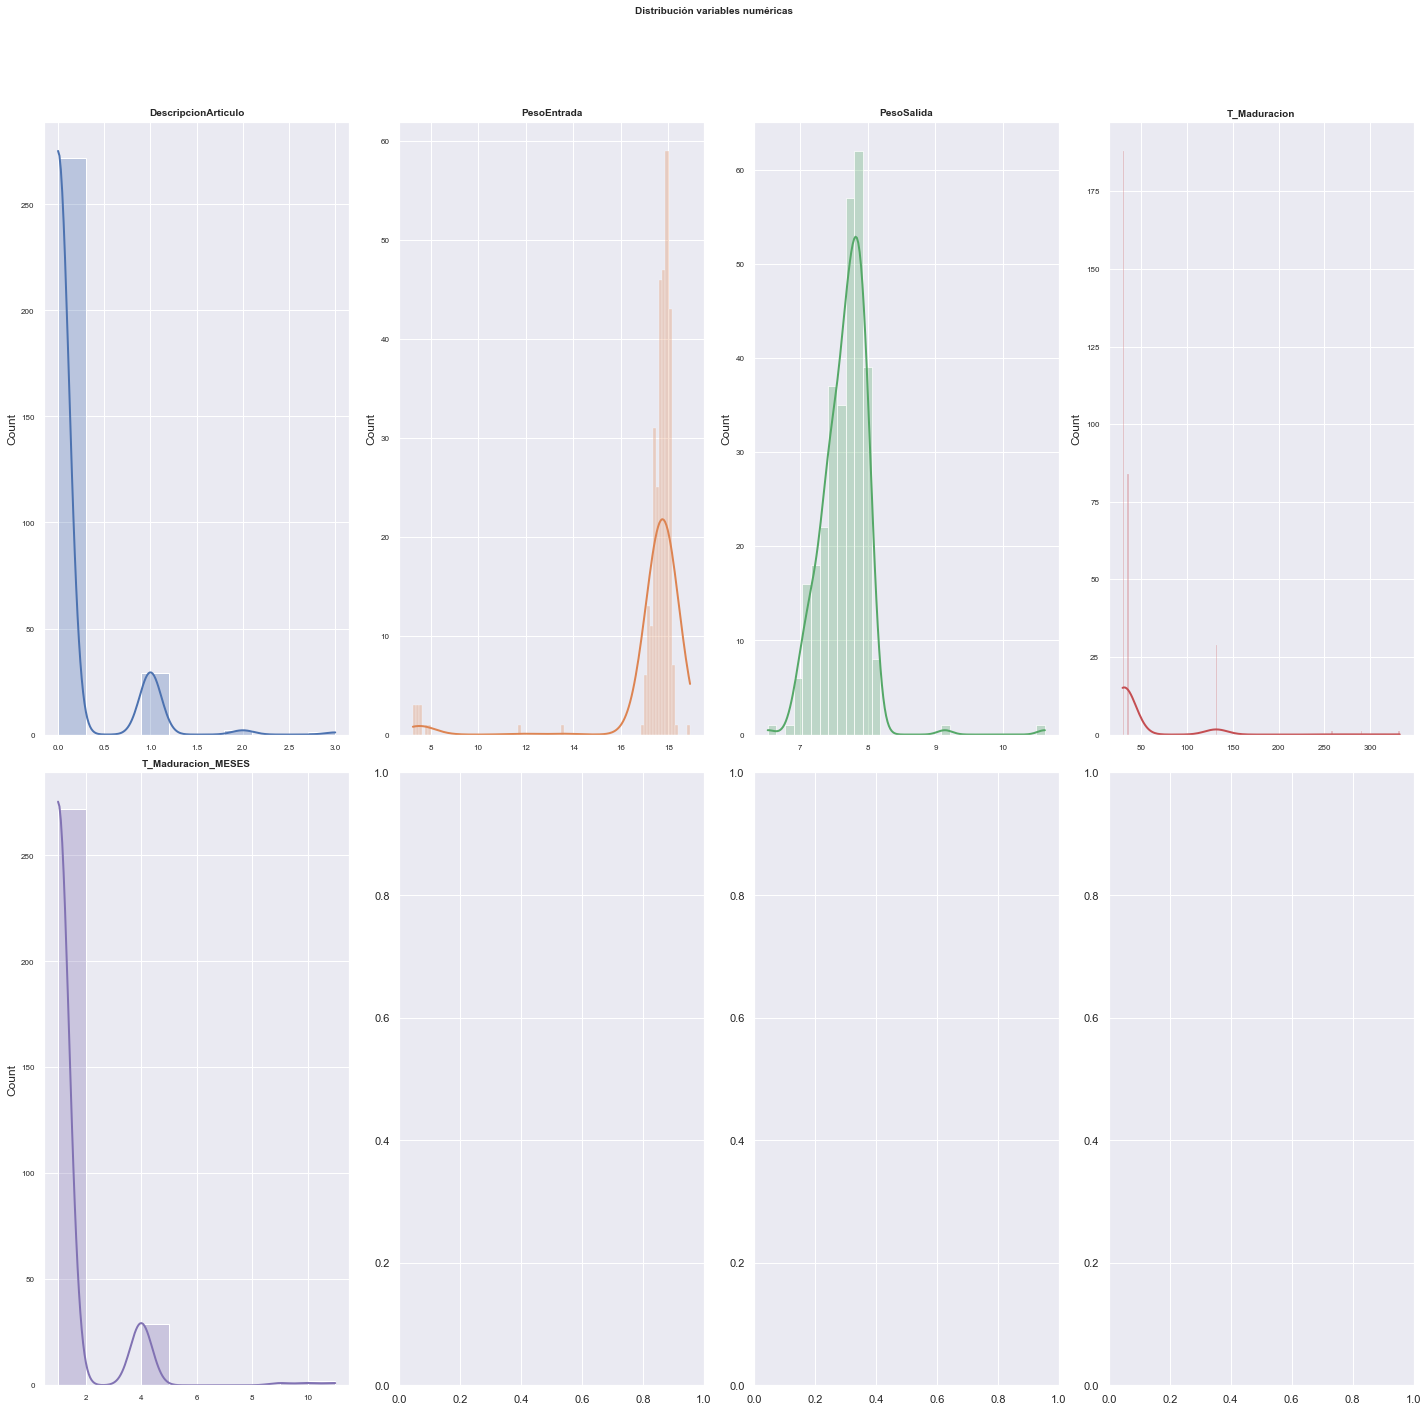

In [30]:
# Gráfico de distribución para cada variable numérica
# ==============================================================================
# Ajustar número de subplots en función del número de columnas
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 20))
axes = axes.flat
columnas_numeric = datos_OneH.select_dtypes(include=['float64','int64','int32']).columns

for i, colum in enumerate(columnas_numeric):
    sns.histplot(
        data    = datos_OneH,
        x       = colum,
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 10, fontweight = "bold")
    axes[i].tick_params(labelsize = 8)
    axes[i].set_xlabel("")


    
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribución variables numéricas', fontsize = 10, fontweight = "bold");

# Ajuste modelo

### División de datos en train y test

In [31]:
x = datos_OneH[['PesoEntrada','PesoSalida','Raza_100% IBERICO','Raza_50% IBERICO','Alimentacion_BELLOTA','Alimentacion_CEBO DE CAMPO']]
y = datos_OneH['T_Maduracion_MESES']

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8,random_state=1234,shuffle=True)

## Logistic Regresion

In [32]:
# Entrenamos el modelo
modeloLR = LogisticRegression(max_iter=200)
modeloLR.fit(x_train,y_train)

#Predecimos sobre el dataset de test
y_pred = modeloLR.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print('Precision: {:.3f}'.format(accuracy*100))

Precision: 85.246


## Modelo regresión

In [33]:
x_train = sm.add_constant(x_train, prepend=True)
modelo = sm.OLS(endog=y_train, exog=x_train,)
modelo = modelo.fit()
print(modelo.summary())


                            OLS Regression Results                            
Dep. Variable:     T_Maduracion_MESES   R-squared:                       0.369
Model:                            OLS   Adj. R-squared:                  0.361
Method:                 Least Squares   F-statistic:                     46.63
Date:                Thu, 12 May 2022   Prob (F-statistic):           9.23e-24
Time:                        19:09:19   Log-Likelihood:                -303.51
No. Observations:                 243   AIC:                             615.0
Df Residuals:                     239   BIC:                             629.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

## Regresión Lineal metodo 1

In [34]:
# División de los datos en train y test
# ==============================================================================
x2 = datos_OneH[['PesoEntrada']]
#x2_train=np.array(x2)
y2 = datos_OneH['T_Maduracion_MESES']

x2_train, x2_test, y2_train, y2_test = train_test_split(x2.values.reshape(-1,1),y2.values.reshape(-1,1),train_size = 0.8, random_state = 1234,shuffle = True)

# Creación del modelo
# ==============================================================================
modelo = LinearRegression()
modelo.fit(x2_train.reshape(-1,1), y2_train)

LinearRegression()

In [35]:
# Información del modelo
# ==============================================================================
print("Intercept:", modelo.intercept_)
print("Coeficiente:", list(zip(x2.columns, modelo.coef_.flatten(), )))
print("Coeficiente de determinación R^2:", modelo.score(x2, y2))

Intercept: [0.65599491]
Coeficiente: [('PesoEntrada', 0.0379078620382939)]
Coeficiente de determinación R^2: -0.011397221558220982
